In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

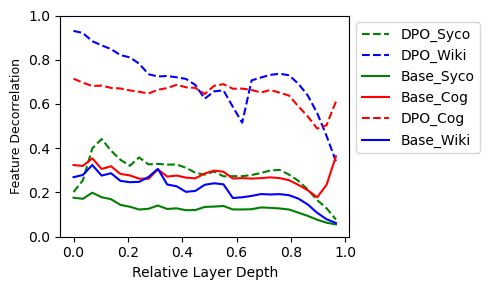

In [3]:
plt.figure(figsize=(5,3))
import os
dir = ""
for index, filename in enumerate(os.listdir(dir)):
    if "step" in filename:
        continue
    file_name = dir+filename
    our_tokenuni = open(file_name).readlines()
    x = [1/len(our_tokenuni)*i for i in range(len(our_tokenuni))]
    label_name = ""
    if "dpo" in file_name:
        linestyle="dashed"
        label_name +="DPO"
    else:
        linestyle="solid"
        label_name +="Base"
        
    if "syco" in file_name:
        color = "green"
        label_name +="_Syco"
    elif "cog" in file_name:
        color = "red"
        label_name +="_Cog"
    elif "wiki" in file_name:
        color = "blue"
        label_name +="_Wiki"
    plt.plot(x,[1-float(x.strip().split()[1]) for x in our_tokenuni],label=label_name,linestyle=linestyle,color=color)
plt.xlabel("Relative Layer Depth",fontsize=10)
plt.ylabel("Feature Decorrelation",fontsize=9)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("feature_deco_dpo.pdf")

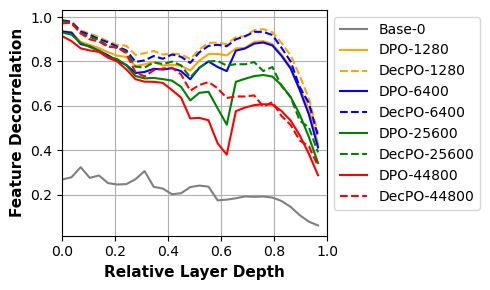

In [14]:
linecolor = ["red","green","blue","orange"]
plt.figure(figsize=(5,3))
base_tokenuni = open("results/base_tokenuni_wiki2_nontoxic_paired_data.txt").readlines()
y_base = [1-float(x.strip().split()[1]) for x in base_tokenuni]
plt.plot(x,y_base,label=f"Base-0",linestyle='solid',color="grey")
for step in [20,100,400,740]:
    # step=20
    our_tokenuni = open(f"results/ours_tokenuni_wiki2_nontoxic_paired_data_step_{step}.txt").readlines()
    dpo_tokenuni = open(f"results/dpo_tokenuni_wiki2_nontoxic_paired_data_step_{step}.txt").readlines()
    x = [1/len(our_tokenuni)*i for i in range(len(dpo_tokenuni))]
    y1 = [1-float(x.strip().split()[1]) for x in dpo_tokenuni]
    y2 = [1-float(x.strip().split()[1]) for x in our_tokenuni]
    lcolor = linecolor.pop()
    step_dis = 64*step
    plt.plot(x,y1,label=f"DPO-{step_dis}",linestyle='solid',color=lcolor)
    plt.plot(x,y2,label=f"DecPO-{step_dis}",linestyle='dashed',color=lcolor)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.xlabel("Relative Layer Depth",fontsize=11,fontweight='bold')
plt.ylabel('Feature Decorrelation',fontsize=11,fontweight='bold')
# plt.legend(fontsize=8)
plt.tight_layout()
# plt.show()
plt.savefig("fea_DecPO_steps_wBase.pdf")